##Lista 12 - Exercicio 24


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
import seaborn as sns
from sklearn.model_selection import train_test_split

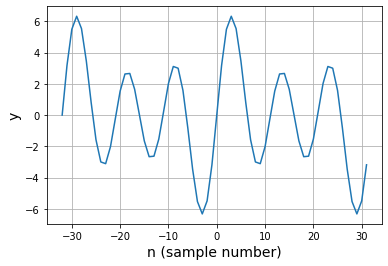

In [ ]:
seed = 42
np.random.seed(seed)
N = 64
k = 2
n = np.arange(0,N) - (N/2)
y = np.sin(2*np.pi*(k/N)*n) + 2*np.sin(2*np.pi*2*(k/N)*n) + 4*np.sin(2*np.pi*3*(k/N)*n)
plt.plot(n,y)
plt.grid()
plt.xlabel('n (sample number)', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()


In [ ]:
Y = np.fft.fft(y)


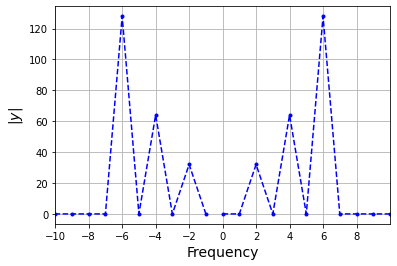

In [ ]:
Y = Y.reshape(N,)
Y_abs = np.abs(Y)
freqs = np.fft.fftfreq(N, d=(1.0/(N*1.0)))
plt.plot(freqs[0:32], Y_abs[0:32], '--.b')
plt.plot(freqs[32:N], Y_abs[32:N], '--.b')
plt.xlim(-10,10)
plt.xticks(range(-10,10,2))
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('$\|y\|$', fontsize=14)
plt.grid()
plt.show()

In [ ]:
M = 10000
X = np.zeros((M,2*N))
y = np.zeros((M,2*N))
for i in range(M):
  s = np.random.normal(loc=0.0, scale=10.0, size=(N,))
  S = np.fft.fft(s)
  X[i,0::2] = s.real
  X[i,1::2] = s.imag
  y[i,0::2] = S.real
  y[i,1::2] = S.imag
  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)


In [ ]:
parameters = {
    'hidden_layer_sizes' : [(N,),(N,N),(N,N,N)],
    'learning_rate' : ['adaptive','invscaling','constant'],
    'activation':['relu','logistic'],
    'batch_size' : [64, 128, 256]
}

# Instantiate MLPRegressor.
clf3 = MLPRegressor(solver='adam', max_iter=10000, random_state=seed)

# Instantiate GridSearchCV.
gs = GridSearchCV(clf3, parameters, verbose=4, cv=5) #Atribuido cv = 5 devido a demora para execução do codigo

# Train the MLP regressor with grid search.
gs.fit(X, y)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END activation=relu, batch_size=64, hidden_layer_sizes=(64,), learning_rate=adaptive;, score=0.983 total time= 2.3min
[CV 2/5] END activation=relu, batch_size=64, hidden_layer_sizes=(64,), learning_rate=adaptive;, score=0.983 total time= 1.9min
[CV 3/5] END activation=relu, batch_size=64, hidden_layer_sizes=(64,), learning_rate=adaptive;, score=0.983 total time= 2.1min
[CV 4/5] END activation=relu, batch_size=64, hidden_layer_sizes=(64,), learning_rate=adaptive;, score=0.983 total time= 2.0min
[CV 5/5] END activation=relu, batch_size=64, hidden_layer_sizes=(64,), learning_rate=adaptive;, score=0.983 total time= 2.1min
[CV 1/5] END activation=relu, batch_size=64, hidden_layer_sizes=(64,), learning_rate=invscaling;, score=0.983 total time= 2.0min
[CV 2/5] END activation=relu, batch_size=64, hidden_layer_sizes=(64,), learning_rate=invscaling;, score=0.983 total time= 1.9min
[CV 3/5] END activation=relu, batch_size=64, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 3/5] END activation=logistic, batch_size=64, hidden_layer_sizes=(64,), learning_rate=constant;, score=0.958 total time= 6.9min


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 4/5] END activation=logistic, batch_size=64, hidden_layer_sizes=(64,), learning_rate=constant;, score=0.055 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 5/5] END activation=logistic, batch_size=64, hidden_layer_sizes=(64,), learning_rate=constant;, score=0.028 total time=   0.9s


In [ ]:
print(gs.best_params_)

###Devido ao tempo gasto com o gs.fit() nao foi possivel exibir o conjunto de hiperparametros ideais e comparar as saidas. FIcou várias horas executando o método e não terminou.

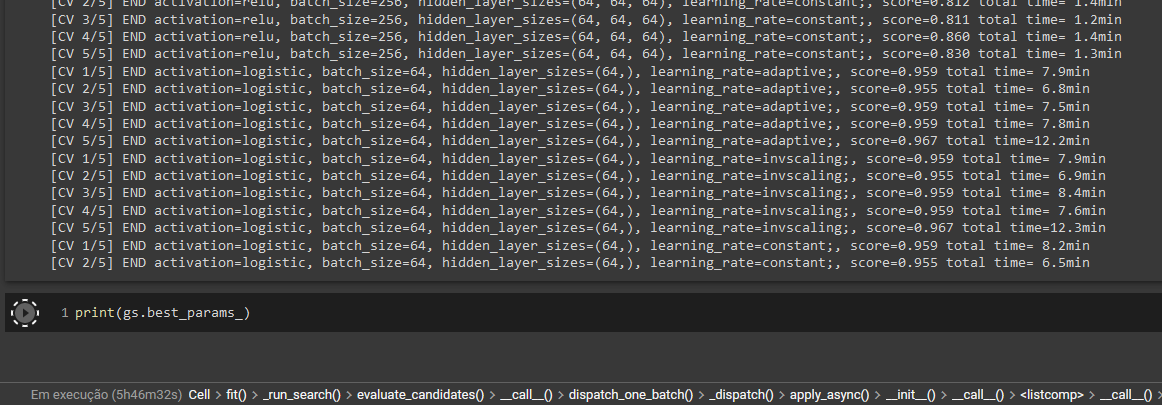